In [1]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt

In [2]:
f = open("dialogs.txt",'r')
print(f.read())

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [3]:
df = pd.read_csv('dialogs.txt',names = ('Query','Response'),sep=('\t'))

In [4]:
df

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


### Dataframe Info

In [5]:
df.shape

(3725, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [7]:
df.describe()

,Query,Response
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [8]:
df.nunique()

Query       3510
Response    3512
dtype: int64

In [9]:
df.isnull().sum()

Query       0
Response    0
dtype: int64

In [10]:
df['Query'].value_counts()

what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: Query, Length: 3510, dtype: int64

In [11]:
df['Response'].value_counts()

what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: Response, Length: 3512, dtype: int64

### Data Visualization

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
Text = df['Query']

In [14]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
    print(sentence)
    
    ss = sid.polarity_scores(sentence)
    for k in ss:
        print('{0}: {1}, '.format(k, ss[k]),end='')
    print()    

hi, how are you doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm fine. how about yourself?
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
i'm pretty good. thanks for asking.
neg: 0.0, neu: 0.25, pos: 0.75, compound: 0.8402, 
no problem. so how have you been?
neg: 0.495, neu: 0.505, pos: 0.0, compound: -0.5994, 
i've been great. what about you?
neg: 0.0, neu: 0.549, pos: 0.451, compound: 0.6249, 
i've been good. i'm in school right now.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
what school do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i go to pcc.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you like it there?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
it's okay. it's a really big campus.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 
good luck with school.
neg: 0.0, neu: 0.253, pos: 0.747, compound: 0.7096, 
how's it going?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm doing well. how about you?
neg: 0.0, neu: 0.704, pos: 0.2

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's nice, but tell me what she looks like.
neg: 0.0, neu: 0.576, pos: 0.424, compound: 0.631, 
the first thing i noticed was her beautiful brown eyes.
neg: 0.0, neu: 0.672, pos: 0.328, compound: 0.5994, 
i think i might've bumped into her before.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
are you telling me that you've seen her before?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
have you met the new girl?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no. have you?
neg: 0.524, neu: 0.476, pos: 0.0, compound: -0.296, 
she's one of the prettiest girls at the school.
neg: 0.0, neu: 0.684, pos: 0.316, compound: 0.5719, 
what does she look like?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
well, she's quite short.
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.2732, 
how tall would you say that she is?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i would say she's only five feet.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what 

neg: 0.0, neu: 0.61, pos: 0.39, compound: 0.4939, 
i couldn't help laughing, either. 
neg: 0.71, neu: 0.29, pos: 0.0, compound: -0.5975, 
same here.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i bought the movie. would you like to come to my house and watch it?
neg: 0.0, neu: 0.839, pos: 0.161, compound: 0.3612, 
out of every movie that you've seen, which one is your favorite?
neg: 0.0, neu: 0.786, pos: 0.214, compound: 0.4588, 
i'm going to have to say that superbad is the best movie ever.
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.6369, 
you think so, how come?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, superbad is super funny.
neg: 0.0, neu: 0.183, pos: 0.817, compound: 0.836, 
you're not lying, i found that movie absolutely hilarious.
neg: 0.0, neu: 0.51, pos: 0.49, compound: 0.6974, 
i didn't know that you saw superbad before.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i made sure to be in line to see it the first day it came out.
neg: 0.0, neu: 0.859, pos: 0.141,

i've actually been busy lately.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what have you been doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i've just been working really hard.
neg: 0.253, neu: 0.747, pos: 0.0, compound: -0.1761, 
i've also been busy.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tell me what you've been doing.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
basically, i've been working too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well whatever, i'm glad you came.
neg: 0.0, neu: 0.44, pos: 0.56, compound: 0.6249, 
i'm really happy that you came to visit me.
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.6115, 
i really missed you a lot.
neg: 0.454, neu: 0.546, pos: 0.0, compound: -0.3597, 
i've been missing you like crazy.
neg: 0.455, neu: 0.297, pos: 0.248, compound: -0.2732, 
i don't understand why you haven't come to visit me.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
lately, i've been quite busy.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tell me

neg: 0.196, neu: 0.804, pos: 0.0, compound: -0.0572, 
well, it's really none of your business.
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.2732, 
that's harsh.
neg: 0.744, neu: 0.256, pos: 0.0, compound: -0.4404, 
i'm sorry, but i have to go.
neg: 0.187, neu: 0.813, pos: 0.0, compound: -0.0387, 
i've enjoyed conversing with you.
neg: 0.0, neu: 0.548, pos: 0.452, compound: 0.5106, 
is there a reason why you're trying to get off the phone so fast?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i've got to go.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i wasn't done talking to you.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have to do some things, and besides, it's not polite to be nosey.
neg: 0.13, neu: 0.87, pos: 0.0, compound: -0.2023, 
i'm not being nosey. i'm just asking.
neg: 0.0, neu: 0.79, pos: 0.21, compound: 0.1511, 
i really don't think it's any of your business.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's not nice.
neg: 0.538, neu: 0.462, pos: 0.0, compound: 

neg: 0.688, neu: 0.312, pos: 0.0, compound: -0.296, 
then why did the lifeguard dive into the water?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i think he wanted to cool off.
neg: 0.0, neu: 0.685, pos: 0.315, compound: 0.3182, 
he swam right up to you.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
and then he turned right around.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
maybe you're right.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
are you married?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no. i'm divorced.
neg: 0.524, neu: 0.476, pos: 0.0, compound: -0.296, 
when did you get divorced?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i got divorced two years ago.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why did you get divorced?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
my wife left me.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why did she leave you?
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.0516, 
she said she didn't love me anymore.
neg: 0.36, neu: 0.64,

neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.4588, 
i hope god didn't hear that.
neg: 0.0, neu: 0.375, pos: 0.625, compound: 0.6124, 
did you feed the cat?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll do that in a minute.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the cat is meowing. he's hungry.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
okay. i'll feed him right now.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 
you shouldn't make him wait.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i was doing my homework.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the cat doesn't care about your homework.
neg: 0.305, neu: 0.695, pos: 0.0, compound: -0.3875, 
the cat doesn't care about anything.
neg: 0.345, neu: 0.655, pos: 0.0, compound: -0.3875, 
that's the way cats are.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
all they think about is themselves.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
maybe we should get rid of him.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0,

neg: 0.268, neu: 0.732, pos: 0.0, compound: -0.296, 
many shirts come with an extra button.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you're right. this one does have an extra button.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have to go to the bathroom.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you drink too much coffee.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but i love coffee.
neg: 0.0, neu: 0.256, pos: 0.744, compound: 0.7783, 
well, it's your life.
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.2732, 
you eat too much chocolate.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't think so.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
have you looked in the mirror?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you think i'm getting fat?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i didn't say that.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what did you say?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i said i have to go to the bathroom.
neg: 0.0, neu

neg: 0.0, neu: 0.407, pos: 0.593, compound: 0.8074, 
how many best friends do you have?
neg: 0.0, neu: 0.407, pos: 0.593, compound: 0.8074, 
i think about twenty-five.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
hmm. i have only one best friend.
neg: 0.0, neu: 0.351, pos: 0.649, compound: 0.8126, 
i feel sorry for you.
neg: 0.302, neu: 0.698, pos: 0.0, compound: -0.0772, 
i have only a few friends.
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
you must be lonely. i will share my friends with you.
neg: 0.169, neu: 0.473, pos: 0.358, compound: 0.4215, 
don't you ever cheat on me.
neg: 0.0, neu: 0.668, pos: 0.332, compound: 0.357, 
why would i do that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
because men like to cheat.
neg: 0.353, neu: 0.353, pos: 0.294, compound: -0.128, 
some men do, but not me.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm watching you.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm an open book. watch me all you want.
neg: 0.0, neu: 0.86, pos: 0.1

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but i don't have a tissue.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
then go find a tissue in the bathroom.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i didn't have time to get one from there.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
your sleeves are not tissues.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but mom, all my friends use their sleeves.
neg: 0.0, neu: 0.628, pos: 0.372, compound: 0.631, 
that doesn't make it right.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i saw dad wipe his nose on his sleeve yesterday.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i will talk to your father about that.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i bet dad did it all the time when he was my age.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
your daddy was a good little boy.
neg: 0.0, neu: 0.633, pos: 0.367, compound: 0.4404, 
i'm worried.
neg: 0.688, neu: 0.312, pos: 0.0, compound: -0.296, 
worried about what?
neg: 0.524, ne

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't know. it's not my mud.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, someone brought it into the house.
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.2732, 
look at the bottom of my shoesthey're clean.
neg: 0.0, neu: 0.722, pos: 0.278, compound: 0.4019, 
of course they're clean. you left all the mud on the carpet.
neg: 0.0, neu: 0.803, pos: 0.197, compound: 0.4019, 
okay, i'll get the vacuum cleaner.
neg: 0.0, neu: 0.526, pos: 0.474, compound: 0.3818, 
don't vacuum it now.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
don't you want me to clean up the mud?
neg: 0.112, neu: 0.641, pos: 0.247, compound: 0.3565, 
wait till it dries. it will be easier to vacuum.
neg: 0.0, neu: 0.763, pos: 0.237, compound: 0.4215, 
what are you getting for your mom?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what are you talking about?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
sunday is mother's day.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 

high school.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i teach high school english.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i didn't know that.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i started teaching five years ago.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how do you like it?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
do you see all this gray hair? it was totally black five years ago.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
parking at school is impossible.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll say.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i drove around for half an hour.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
did you find a spot?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i found a spot, but someone cut in and took it from me.
neg: 0.209, neu: 0.791, pos: 0.0, compound: -0.3919, 
did you yell at them?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, i did.
neg: 0.0, neu: 0.27, pos: 0.73, compound: 0.4019, 
and?
neg: 

neg: 0.0, neu: 0.822, pos: 0.178, compound: 0.0772, 
you bought a new car?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes. i bought a cadillac.
neg: 0.0, neu: 0.426, pos: 0.574, compound: 0.4019, 
a luxury car.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
luxury plus speed.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what are we waiting for?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
let me get the keys.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have to go to the bathroom.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why didn't you go before we left?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i did, but i have to go again.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, hold on a little longer.
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
i think i'm going to explode.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
just hold on.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh! don't hit any more bumps!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
we'll be

neg: 0.437, neu: 0.563, pos: 0.0, compound: -0.4767, 
especially the metal ones.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't park at a store that uses metal shopping carts.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's a good idea, but there was a good sale at this store.
neg: 0.0, neu: 0.608, pos: 0.392, compound: 0.7003, 
did you save any money on the sale?
neg: 0.0, neu: 0.686, pos: 0.314, compound: 0.4939, 
yes, i did. i saved about $50.
neg: 0.0, neu: 0.353, pos: 0.647, compound: 0.6705, 
that's great.
neg: 0.0, neu: 0.196, pos: 0.804, compound: 0.6249, 
did you see "titanic"?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes. it is a great movie.
neg: 0.0, neu: 0.306, pos: 0.694, compound: 0.7783, 
i saw it twelve times.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i saw it eight times.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have the dvd.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so do i.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
let's go to you

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why not?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you know i don't like crowds.
neg: 0.345, neu: 0.655, pos: 0.0, compound: -0.2755, 
let's go to an early movie.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
okay, that won't be very crowded.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 
what would you like to see?
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
oh, i don't care. you're the one who wants to go out.
neg: 0.208, neu: 0.792, pos: 0.0, compound: -0.3875, 
well, i want to see "the pursuit of happyness."
neg: 0.0, neu: 0.638, pos: 0.362, compound: 0.34, 
what have you heard about it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's based on a true story about a divorced man and his young son.
neg: 0.0, neu: 0.797, pos: 0.203, compound: 0.4215, 
what's your favorite thing to do?
neg: 0.0, neu: 0.625, pos: 0.375, compound: 0.4588, 
i like to watch people.
neg: 0.0, neu: 0.545, pos: 0.455, compound: 0.3612, 
that's

neg: 0.345, neu: 0.655, pos: 0.0, compound: -0.2755, 
i have a date tomorrow night.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
really? who with?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a girl i met at the market.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you met a girl at the supermarket?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
she was standing behind me in a really slow line at the checkout counter.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what did you say to her?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i had two pineapples in my cart, and she asked where i had found them.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
she asked you about your pineapples?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i told her i had gotten the last two on the shelf, but i offered her one of mine.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that was nice of you.
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.4215, 
she asked me how she could return the favor, so i asked h

neg: 0.0, neu: 0.358, pos: 0.642, compound: 0.5563, 
how much were they?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they were on sale for $80.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do they help you run faster?
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
no, but my feet don't hurt anymore.
neg: 0.156, neu: 0.487, pos: 0.357, compound: 0.4703, 
then they're worth every penny.
neg: 0.0, neu: 0.678, pos: 0.322, compound: 0.2263, 
you might want to buy a pair.
neg: 0.0, neu: 0.794, pos: 0.206, compound: 0.0772, 
tiger is the greatest golfer in the world.
neg: 0.0, neu: 0.625, pos: 0.375, compound: 0.6369, 
you can say that again.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but i'm worried about tiger.
neg: 0.412, neu: 0.588, pos: 0.0, compound: -0.4215, 
why is that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
because he likes to scuba dive.
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
what's wrong with that?
neg: 0.508, neu: 0.492, pos: 0.0, compound: -0.476

neg: 0.661, neu: 0.339, pos: 0.0, compound: -0.5994, 
yes, he did. his cat died, too.
neg: 0.319, neu: 0.442, pos: 0.239, compound: -0.2263, 
that's too bad. what about his smoke alarm?
neg: 0.496, neu: 0.504, pos: 0.0, compound: -0.7096, 
the battery was dead.
neg: 0.589, neu: 0.411, pos: 0.0, compound: -0.6486, 
a good battery would have saved his life.
neg: 0.0, neu: 0.467, pos: 0.533, compound: 0.6908, 
he had cigarettes, but no battery.
neg: 0.359, neu: 0.641, pos: 0.0, compound: -0.4215, 
they say he has started fifteen big fires.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
he's been in jail three times already.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why did they ever let him out?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's the law. they can't keep him in jail forever.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why not? everyone knows he's a firebug. he loves to start fires.
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.5719, 
i don't know. sometimes the law does

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i need to fly to new york.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
when are you going?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
during the christmas holidays.
neg: 0.0, neu: 0.536, pos: 0.464, compound: 0.3818, 
you'd better buy your ticket now.
neg: 0.0, neu: 0.633, pos: 0.367, compound: 0.4404, 
you must be kidding.
neg: 0.0, neu: 0.682, pos: 0.318, compound: 0.1027, 
no, i'm not. it's march. time is running out. seats are selling out right now.
neg: 0.136, neu: 0.864, pos: 0.0, compound: -0.296, 
i thought i would wait until october.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll bet this is the first time you've ever flown during christmas.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you're right.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, listen to me. you need to buy a ticket now.
neg: 0.0, neu: 0.811, pos: 0.189, compound: 0.2732, 
but maybe prices will be cheaper in october.
neg: 0.0, neu: 1.0, pos: 0.0, co

did you shine your shoes?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
my shoes are shined.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do your socks match?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
of course they match.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no, they don't. one is black and one is dark blue.
neg: 0.18, neu: 0.82, pos: 0.0, compound: -0.296, 
life is hard.
neg: 0.412, neu: 0.588, pos: 0.0, compound: -0.1027, 
it sure is.
neg: 0.0, neu: 0.465, pos: 0.535, compound: 0.3182, 
i thought school was hard.
neg: 0.318, neu: 0.682, pos: 0.0, compound: -0.1027, 
me, too. i couldn't wait to graduate.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but now work is hard, too.
neg: 0.242, neu: 0.758, pos: 0.0, compound: -0.1531, 
i agree. work is just as hard as school.
neg: 0.141, neu: 0.606, pos: 0.253, compound: 0.2732, 
sometimes i wish i was back in school.
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
me, too. school was fun.
neg: 0.0, neu: 0.548, pos: 0.452

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so, you didn't become a doctor.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
and now i'm glad that i didn't.
neg: 0.0, neu: 0.625, pos: 0.375, compound: 0.4588, 
why's that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a hospital is the most dangerous place in the world.
neg: 0.298, neu: 0.702, pos: 0.0, compound: -0.5256, 
oh, yes, because of all the killer germs.
neg: 0.331, neu: 0.462, pos: 0.208, compound: -0.3818, 
if you're a smart doctor, you stay away from hospitals.
neg: 0.0, neu: 0.748, pos: 0.252, compound: 0.4019, 
i want to be a mail carrier when i grow up.
neg: 0.0, neu: 0.843, pos: 0.157, compound: 0.0772, 
why?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
because you get to meet a lot of people.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you sure do.
neg: 0.0, neu: 0.465, pos: 0.535, compound: 0.3182, 
and you get a lot of exercise every day.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's the truth.
neg: 0.0, neu

neg: 0.17, neu: 0.62, pos: 0.21, compound: 0.1298, 
i guess he has to be very careful about what he eats.
neg: 0.0, neu: 0.841, pos: 0.159, compound: 0.2247, 
i'm gaining weight.
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4215, 
how much have you gained?
neg: 0.0, neu: 0.606, pos: 0.394, compound: 0.3818, 
three pounds just this month.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you know why?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i think it's the ice cream.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you started eating ice cream?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it was on sale.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how much did you buy?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i filled up my freezer with ice cream.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, it won't last forever.
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
no, i figure i'll finish it all by next week.
neg: 0.216, neu: 0.784, pos: 0.0, compound: -0.296, 
i'm 

neg: 0.0, neu: 0.504, pos: 0.496, compound: 0.7118, 
it's in a great neighborhood.
neg: 0.0, neu: 0.423, pos: 0.577, compound: 0.6249, 
it's close to the beach.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's close to the freeways.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's got a big yard.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the kids love the house, too.
neg: 0.0, neu: 0.543, pos: 0.457, compound: 0.6369, 
if we don't buy it, someone else will.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
we can't afford this house.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
are you sure?
neg: 0.0, neu: 0.465, pos: 0.535, compound: 0.3182, 
we will be house rich, but cash poor.
neg: 0.333, neu: 0.482, pos: 0.185, compound: -0.431, 
what do you mean?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
our monthly payments will be too high.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
we won't have any money for other things?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no, we won't 

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the election is next week.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
who are you voting for?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm not voting for the mayor.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why not?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
he made promises that he didn't keep.
neg: 0.0, neu: 0.698, pos: 0.302, compound: 0.3818, 
like what?
neg: 0.0, neu: 0.286, pos: 0.714, compound: 0.3612, 
he promised to hire 1,000 more police officers.
neg: 0.0, neu: 0.737, pos: 0.263, compound: 0.3612, 
how many did he hire?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
one hundred!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
maybe he had a good reason.
neg: 0.0, neu: 0.58, pos: 0.42, compound: 0.4404, 
maybe he's just a liar.
neg: 0.524, neu: 0.476, pos: 0.0, compound: -0.5106, 
i can't believe he won the election.
neg: 0.375, neu: 0.625, pos: 0.0, compound: -0.4585, 
only 15 percent of the voters turned out.
neg: 0.

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's a little blood?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
your white shirt is ruined.
neg: 0.437, neu: 0.563, pos: 0.0, compound: -0.4767, 
so, i'll just buy another one.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you can wear this one around the house.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
my fingers hurt.
neg: 0.63, neu: 0.37, pos: 0.0, compound: -0.5267, 
why do they hurt?
neg: 0.531, neu: 0.469, pos: 0.0, compound: -0.5267, 
i type too much.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you should take a break.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i need to type to make money.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but typing is causing you pain.
neg: 0.471, neu: 0.529, pos: 0.0, compound: -0.6652, 
maybe i should see a doctor.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
doctors are too expensive.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
he might tell me to rest for a while.
neg: 0.0, neu: 1.

neg: 0.213, neu: 0.787, pos: 0.0, compound: -0.4019, 
i bet i've lost a couple of pounds already.
neg: 0.277, neu: 0.723, pos: 0.0, compound: -0.3182, 
all you've lost is some sweat.
neg: 0.315, neu: 0.685, pos: 0.0, compound: -0.3182, 
i haven't even lost one pound of fat?
neg: 0.0, neu: 0.754, pos: 0.246, compound: 0.2411, 
if you want to lose fat, you've got to do this hike every day.
neg: 0.169, neu: 0.75, pos: 0.081, compound: -0.34, 
oh no, another pimple on my face.
neg: 0.268, neu: 0.732, pos: 0.0, compound: -0.296, 
pimples suck.
neg: 0.744, neu: 0.256, pos: 0.0, compound: -0.4404, 
it seems like i get a new pimple almost every day.
neg: 0.0, neu: 0.762, pos: 0.238, compound: 0.3612, 
maybe it's something in your diet.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no, i eat the same things day after day.
neg: 0.239, neu: 0.761, pos: 0.0, compound: -0.296, 
then maybe it's in your genes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you might be right.
neg: 0.0, neu: 1.0, pos: 

In [15]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df

,Query,Response,rating
0,"hi, how are you doing?",i'm fine. how about yourself?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou..."
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,"{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compou..."
3,no problem. so how have you been?,i've been great. what about you?,"{'neg': 0.495, 'neu': 0.505, 'pos': 0.0, 'comp..."
4,i've been great. what about you?,i've been good. i'm in school right now.,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp..."
...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp..."
3721,are you right-handed?,yes. all my life.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3722,yes. all my life.,you're wearing out your right hand. stop using...,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp..."
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,"{'neg': 0.153, 'neu': 0.625, 'pos': 0.222, 'co..."


In [16]:
df['rating'].apply(pd.Series)

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.690,0.310,0.2023
2,0.000,0.250,0.750,0.8402
3,0.495,0.505,0.000,-0.5994
4,0.000,0.549,0.451,0.6249
...,...,...,...,...
3720,0.000,0.707,0.293,0.4404
3721,0.000,1.000,0.000,0.0000
3722,0.000,0.526,0.474,0.4019
3723,0.153,0.625,0.222,0.2500


In [17]:
df = pd.concat([df.drop(['rating'],axis=1),df['rating'].apply(pd.Series)],axis=1)
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [18]:
from wordcloud import WordCloud

In [19]:
def wordcloud(df,label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color='black',max_words=1000)
    wc.generate(' '.join(text))
    
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label),fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth',random_state=244),alpha=0.98)
    
 

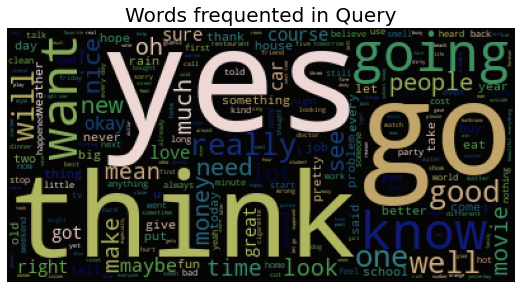

In [20]:
wordcloud(df,'Query')   

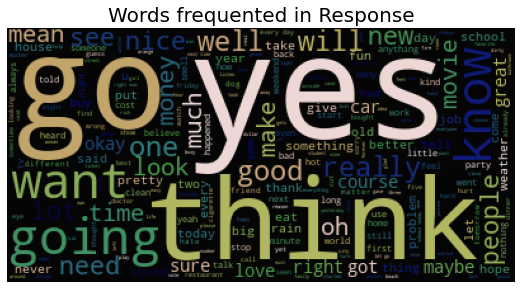

In [21]:
wordcloud(df,'Response')   

### Text Normalization

In [22]:
import re

In [23]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ',x.lower())

In [24]:
remove_n = lambda x: re.sub("\n"," ",x)

In [25]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ',x)

In [26]:
alpha_numeric = lambda x :re.sub('\w*\d\w*',' ',x)

In [27]:
df['Query'] = df['Query'].map(alpha_numeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [28]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right handed,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes all my life,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [29]:
df['Response'] = df['Response'].map(alpha_numeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [30]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3721,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


### Important Sentence

In [31]:
imp_sent = df.sort_values(by='compound',ascending=False)

In [32]:
imp_sent.head(5)

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


### Top Positive Sentence

In [33]:
pos_sent = df.sort_values(by='pos',ascending=False)

In [34]:
pos_sent.head(5)

,Query,Response,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


### Top Negative Sentence

In [35]:
neg_sent = df.sort_values(by='neg',ascending=False)

In [36]:
neg_sent.head(5)

,Query,Response,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


### Top Neutral Sentence

In [37]:
neu_sent = df.sort_values(by='neu',ascending=False)

In [38]:
neu_sent.head(5)

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh that s so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0
1598,i don t understand,if you pour water into a glass the water goes...,0.0,1.0,0.0,0.0


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf = TfidfVectorizer()

In [41]:
factors = tfidf.fit_transform(df['Query']).toarray()

In [42]:
tfidf.get_feature_names()

C:\Users\Rohit Kachhal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 'answer',
 'answered',
 'antenna',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apartment',
 'apologize',
 'apologized',
 'apples',
 'appointment',
 'appreciate',
 'april',
 'are',
 'aren',
 'argument',
 'arizona',
 'arm',
 'arms',
 'army',
 'around',
 'arrow',
 'art',
 'a

### Application

In [43]:
from sklearn.metrics.pairwise import cosine_distances

In [46]:
query = 'who are you ?'
def chatbot(query):
    # step: 1 clean
    query = nu.lemmatization_sentence(query)
    # step: 2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step: 3 cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax()
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                 'response':response,
                 'score':confidence,
                 'pos':pos_score,
                 'neg':neg_score,
                 'neu':neu_score}
    return chat_dict

In [47]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2:
        print('BOT: Please rephrase your Question.')
        
    else:
        print('='*80)
        print('logs: \n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])

USER: hi
logs: 
 Matched Question: 'hi  how are you doing '
 Confidence Score: 68.06 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  i m fine  how about yourself 
USER: rohit
BOT: Please rephrase your Question.
USER: what is date
logs: 
 Matched Question: 'a blind date is a date with someone you don t know '
 Confidence Score: 54.50 
 PositiveScore: 0.0 
 NegativeScore: 0.252
 NeutralScore: 0.748
BOT:  why would i date someone i don t even know 
USER: who are you
logs: 
 Matched Question: 'who '
 Confidence Score: 74.38 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  two students from usc 
USER: exit
